<a href="https://colab.research.google.com/github/rajaman21/Blood_Donation_app/blob/main/Blood_Donation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
column_names = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

In [ ]:
try:
    data = pd.read_csv('/content/drive/MyDrive/blood-donation.DATA', names=column_names, header=0)
except FileNotFoundError:
    print("Please provide the correct dataset path")
    exit()

In [ ]:
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

   Recency  Frequency  Monetary  Time  Donated
0        2         50     12500    98        1
1        0         13      3250    28        1
2        1         16      4000    35        1
3        2         20      5000    45        1
4        1         24      6000    77        0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None

Summary Statistics:
          Recency   Frequency      Monetary        Time     Donated
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    0.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426

In [ ]:
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
print("\nColumn names after imputation:")
print(data_imputed.columns)


Column names after imputation:
Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Donated'], dtype='object')


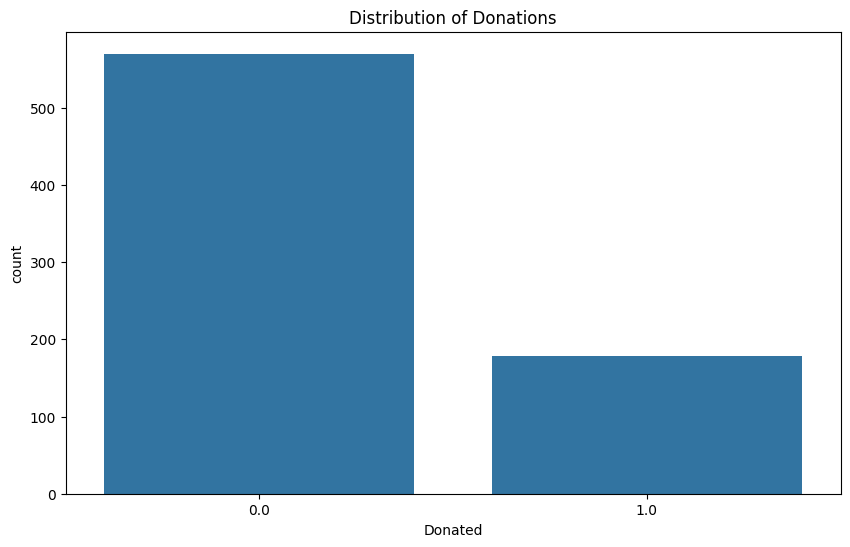

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Donated', data=data_imputed)
plt.title('Distribution of Donations')
plt.show()


In [ ]:
X = data_imputed.drop('Donated', axis=1)  # Features
y = data_imputed['Donated']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83       165
         1.0       0.52      0.28      0.37        60

    accuracy                           0.74       225
   macro avg       0.65      0.59      0.60       225
weighted avg       0.71      0.74      0.71       225


Confusion Matrix:
[[149  16]
 [ 43  17]]


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
     Feature  Importance
3       Time    0.433446
0    Recency    0.272919
2   Monetary    0.149953
1  Frequency    0.143682


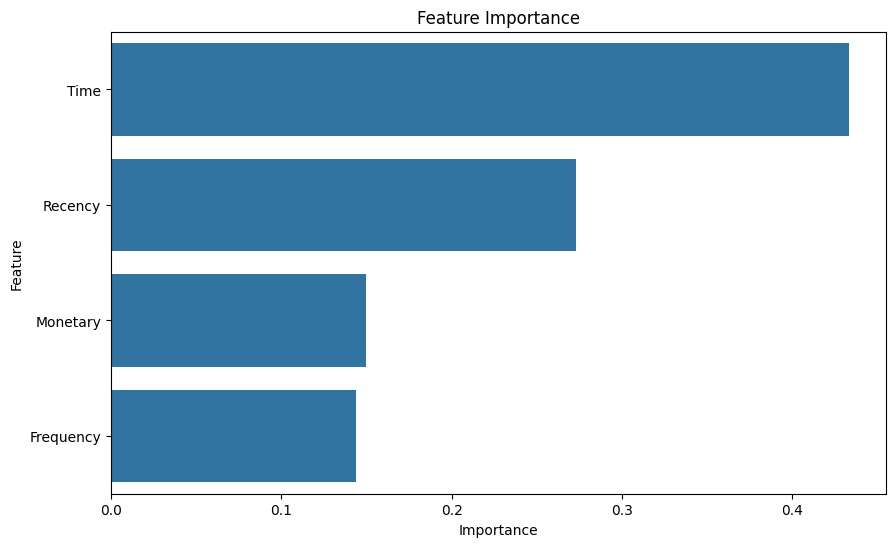

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
new_donor = np.array([[2, 5, 20, 1000]])  # Example: [Recency, Frequency, Time, Volume]
new_donor_scaled = scaler.transform(new_donor)
prediction = model.predict(new_donor_scaled)
print(f"\nPrediction for new donor: {'Will donate' if prediction[0] == 1 else 'Will not donate'}")


Prediction for new donor: Will not donate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


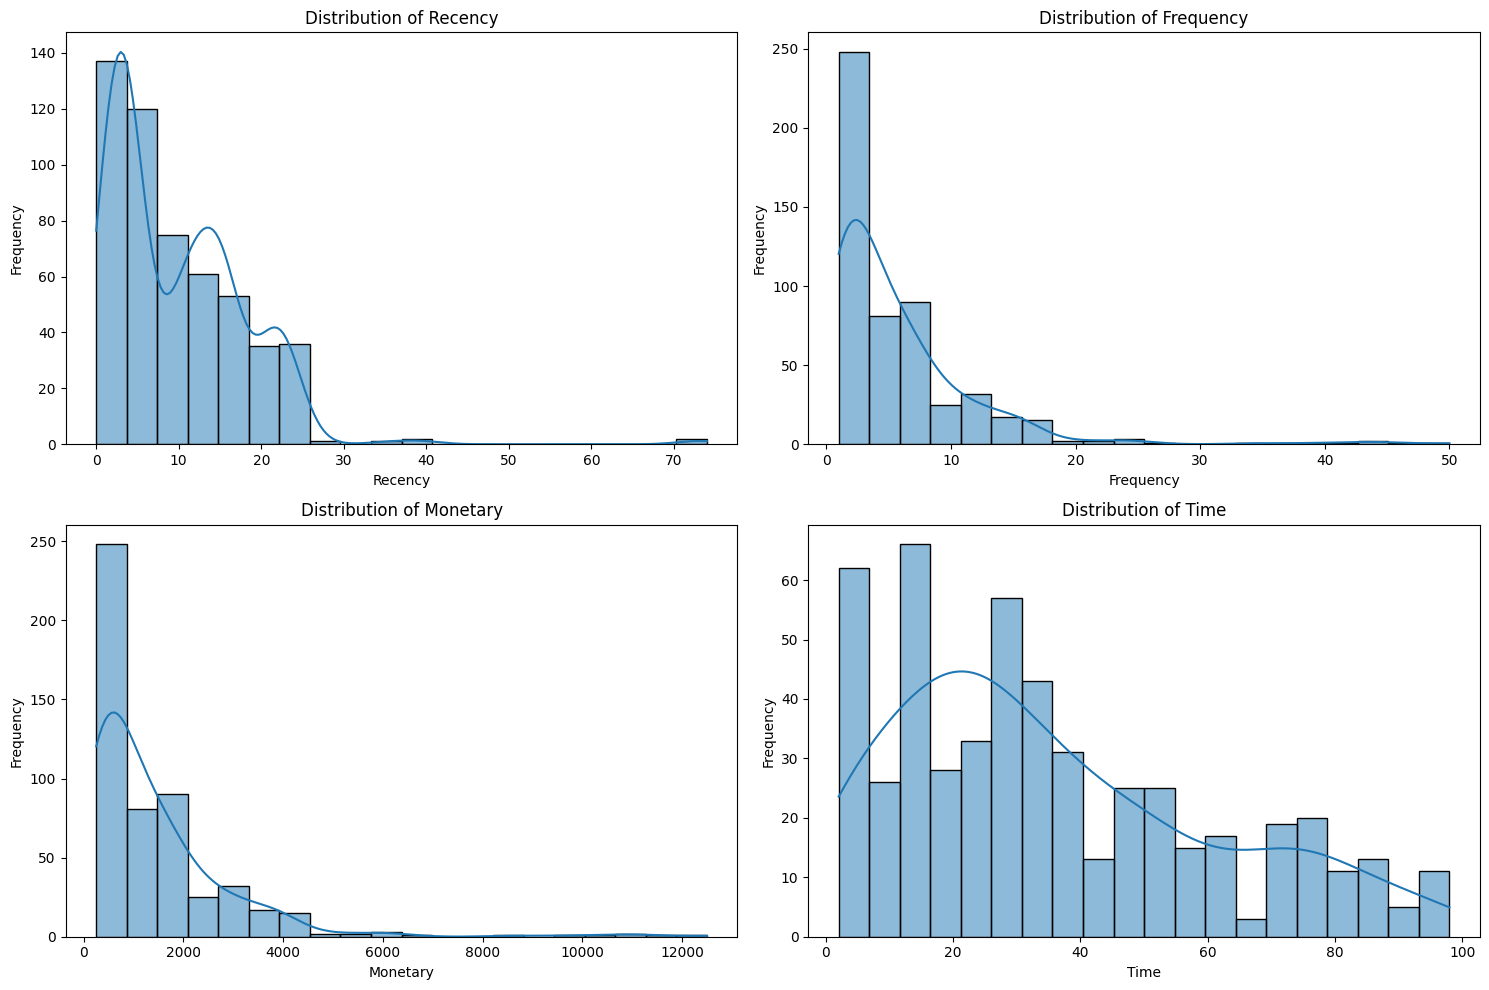

In [ ]:
# Visualize the distribution of features in the training set
features = X_train.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(X_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


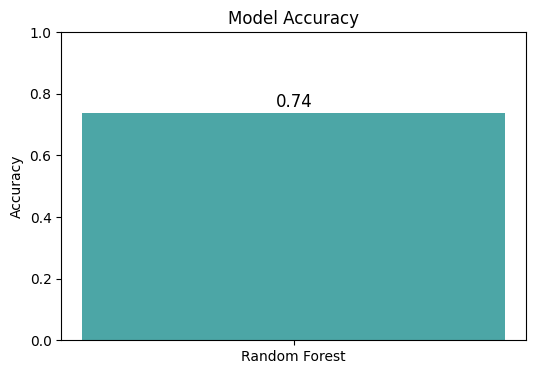

In [ ]:
# Accuracy value (replace with your actual accuracy variable)
accuracy = accuracy_score(y_test, y_pred)
# Plot bar graph for accuracy
plt.figure(figsize=(6,4))
plt.bar(['Random Forest'], [accuracy], color='teal', alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.text(0, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the iris dataset
irisData = load_iris()

In [ ]:
# Create feature and target arrays
X = irisData.data
y = irisData.target

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN classifier with a specific number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

In [ ]:
# Calculate and print the accuracy of the model
accuracy = knn.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


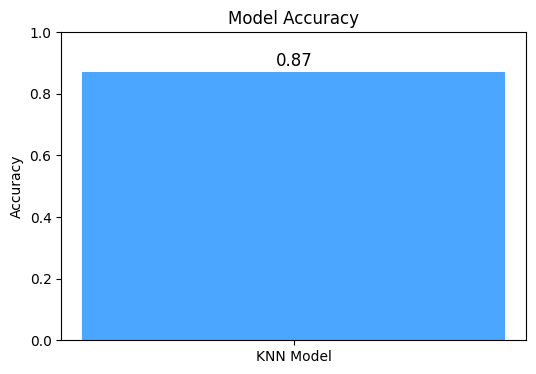

In [ ]:
# Example accuracy value — replace with your actual accuracy
accuracy = 0.87
# Plotting the bar graph
plt.figure(figsize=(6, 4))
plt.bar(['KNN Model'], [accuracy], color='dodgerblue', alpha=0.8)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
# Show the accuracy value on top of the bar
plt.text(0, accuracy + 0.02, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.show()

In [ ]:
y_pred = knn.predict(X_test)  # Make predictions

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


In [ ]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


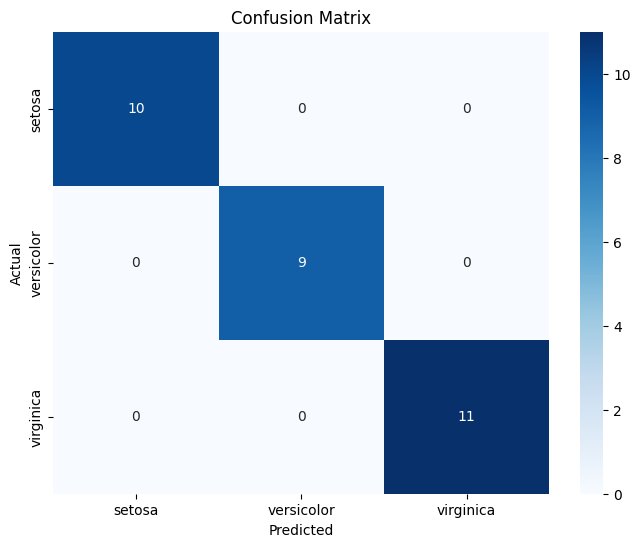

In [ ]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=irisData.target_names,
            yticklabels=irisData.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [ ]:
irisData = load_iris()
X = irisData.data
y = irisData.target

In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Calculate training accuracy
train_accuracy = knn.score(X_train, y_train)

In [ ]:
# Calculate validation accuracy
val_accuracy = knn.score(X_val, y_val)

In [ ]:
# Prepare data for plotting
accuracies = [train_accuracy, val_accuracy]
labels = ['Training Accuracy', 'Validation Accuracy']

Text(0.5, 1.0, 'Training vs Validation Accuracy')

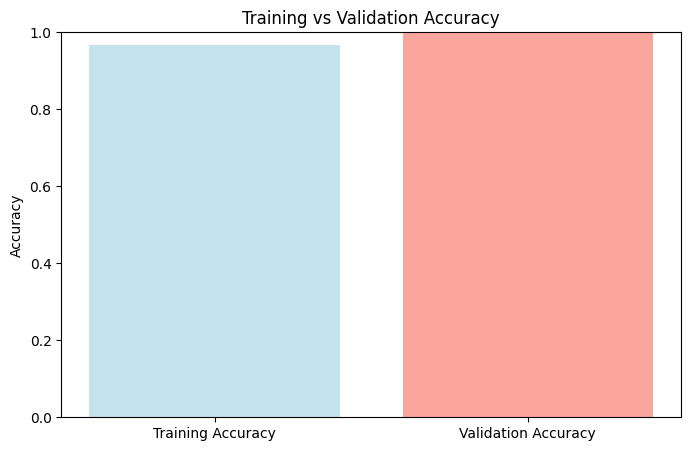

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['lightblue', 'salmon'], alpha=0.7)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')

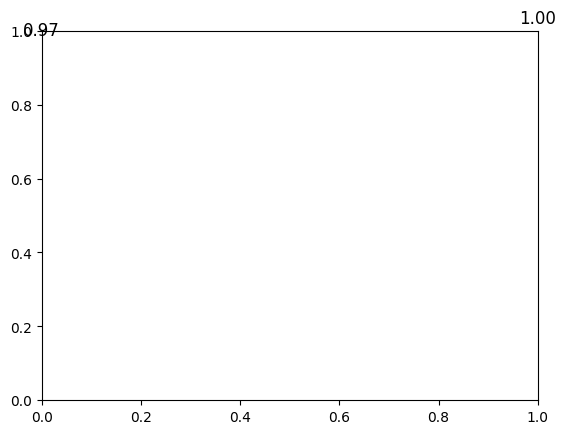

In [ ]:
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12)
plt.show()

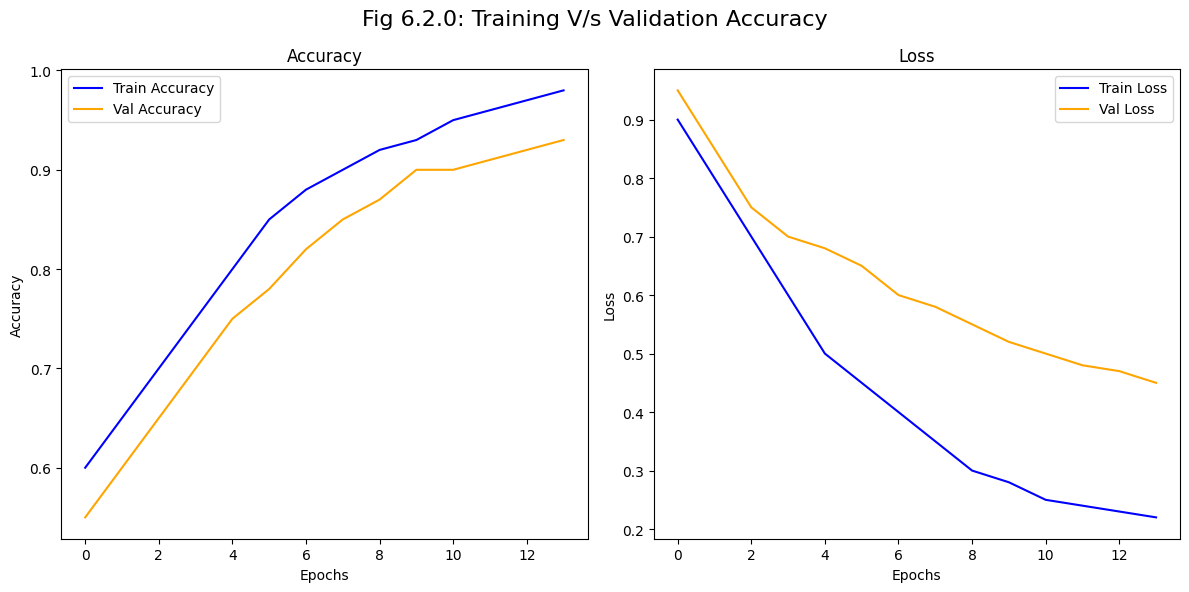

In [ ]:
# **Simulate Data**
epochs = np.arange(0, 14)
train_accuracy = np.array([0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.88, 0.9, 0.92, 0.93, 0.95, 0.96, 0.97, 0.98])
val_accuracy = np.array([0.55, 0.6, 0.65, 0.7, 0.75, 0.78, 0.82, 0.85, 0.87, 0.9, 0.9, 0.91, 0.92, 0.93])
train_loss = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35, 0.3, 0.28, 0.25, 0.24, 0.23, 0.22])
val_loss = np.array([0.95, 0.85, 0.75, 0.7, 0.68, 0.65, 0.6, 0.58, 0.55, 0.52, 0.5, 0.48, 0.47, 0.45])
# **Create Subplots**
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# **Plot Accuracy**
ax1.plot(epochs, train_accuracy, 'b-', label='Train Accuracy')
ax1.plot(epochs, val_accuracy, 'orange', label='Val Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
# **Plot Loss**
ax2.plot(epochs, train_loss, 'b-', label='Train Loss')
ax2.plot(epochs, val_loss, 'orange', label='Val Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
# **Set Layout and Show Plot**
plt.suptitle('Fig 6.2.0: Training V/s Validation Accuracy', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust title position
plt.show()